In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from copy import deepcopy

from BZI.improved_tetrahedron_method import (grid_and_tetrahedra,
                                             calc_fermi_level,
                                            calc_total_energy, 
                                            find_irreducible_tetrahedra)
from BZI.symmetry import make_ptvecs, make_rptvecs, Lattice, find_orbitals
from BZI.integration import rectangular_fermi_level, rectangular_method
from BZI.sampling import make_cell_points
from BZI.plots import PlotMesh
from BZI.pseudopots import FreeElectronModel, Al_PP

Find what is wrong with calc_fermi_level.

In [11]:
lat_angles =[np.pi/2]*3
lat_consts = [1.]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)

degree = 2
nvalence = 1
free = FreeElectronModel(lattice, nvalence, degree)

grid_consts = [10]*3
grid_angles = [np.pi/2]*3
grid_centering = "prim"
grid_vecs = make_ptvecs(grid_centering, grid_consts, grid_angles)
rgrid_vecs = make_rptvecs(grid_vecs)
offset = np.sum(free.lattice.reciprocal_vectors, 1)/2
grid = make_cell_points(free.lattice.reciprocal_vectors, rgrid_vecs, offset)

free.fermi_level = rectangular_fermi_level(free, grid)
sphere_volume = 4./3*np.pi*free.fermi_level**(3./degree)
occupied_volume = free.lattice.reciprocal_volume*free.nvalence_electrons/2
fl_answer = (3*occupied_volume/(4*np.pi))**(degree/3.)


total_energy = rectangular_method(free, grid)
rf = fl_answer**(1./degree)
te_answer = 4*np.pi/(3. + degree)*rf**(3. + degree)

print("fermi level answer ", fl_answer)
print("fermi level ", free.fermi_level)
print("total energy answer ", te_answer)
print("total energy ", total_energy)

fermi level answer  9.57078000063
fermi level  9.86960440109
total energy answer  712.21020659
total energy  712.41382618


In [32]:
lat_shift = [1./2]*3
grid_shift = [0,0,0]
grid, tetrahedra = grid_and_tetrahedra(free, 4, lat_shift, grid_shift)
weights = np.ones(len(tetrahedra))
free.fermi_level = calc_fermi_level(free, tetrahedra, weights, grid)
total_energy = calc_total_energy(free, tetrahedra, weights, grid)


print("fermi level answer ", fl_answer)
print("fermi level ", free.fermi_level)
print("total energy answer ", te_answer)
print("total energy ", total_energy)

fermi level answer  9.57078000063
fermi level  10.8232421875
total energy answer  712.21020659
total energy  783.9448258460225


In [33]:
irr_tet, irr_weights = find_irreducible_tetrahedra(free, tetrahedra, grid)

In [34]:
calc_fermi_level(free, irr_tet, irr_weights, grid)

10.8232421875

In [8]:
lat_angles =[np.pi/2]*3
lat_consts = [1]*3
lat_centering = "prim"
lattice = Lattice(lat_centering, lat_consts, lat_angles)

degree = 2
nvalence = 1
free = FreeElectronModel(lattice, nvalence, degree)

In [9]:
ndiv0 = np.array([2,2,2])
offset = [1./2]*3
grid, tetrahedra = grid_and_tetrahedra(free, ndiv0, offset)

irreducible_tetrahedra, weights1 = find_irreducible_tetrahedra(free, tetrahedra, grid)
fermi_level1 = calc_fermi_level(free, irreducible_tetrahedra, weights1, grid)

weights2 = np.ones(len(tetrahedra))
fermi_level2 = calc_fermi_level(free, tetrahedra, weights2, grid)

print(fermi_level1)
print(fermi_level2)

11.3212890625
14.80078125


In [36]:
grid, tetrahedra = grid_and_tetrahedra(free, [2,2,2], [1./2]*3)

In [37]:
irr_tet, weights = find_irreducible_tetrahedra(free, tetrahedra, grid)

In [38]:
calc_fermi_level(free, irr_tet, weights, grid)

11.3212890625

In [39]:
calc_fermi_level(free, tetrahedra, np.ones(len(tetrahedra)), grid)

14.80078125

<IPython.core.display.Javascript object>


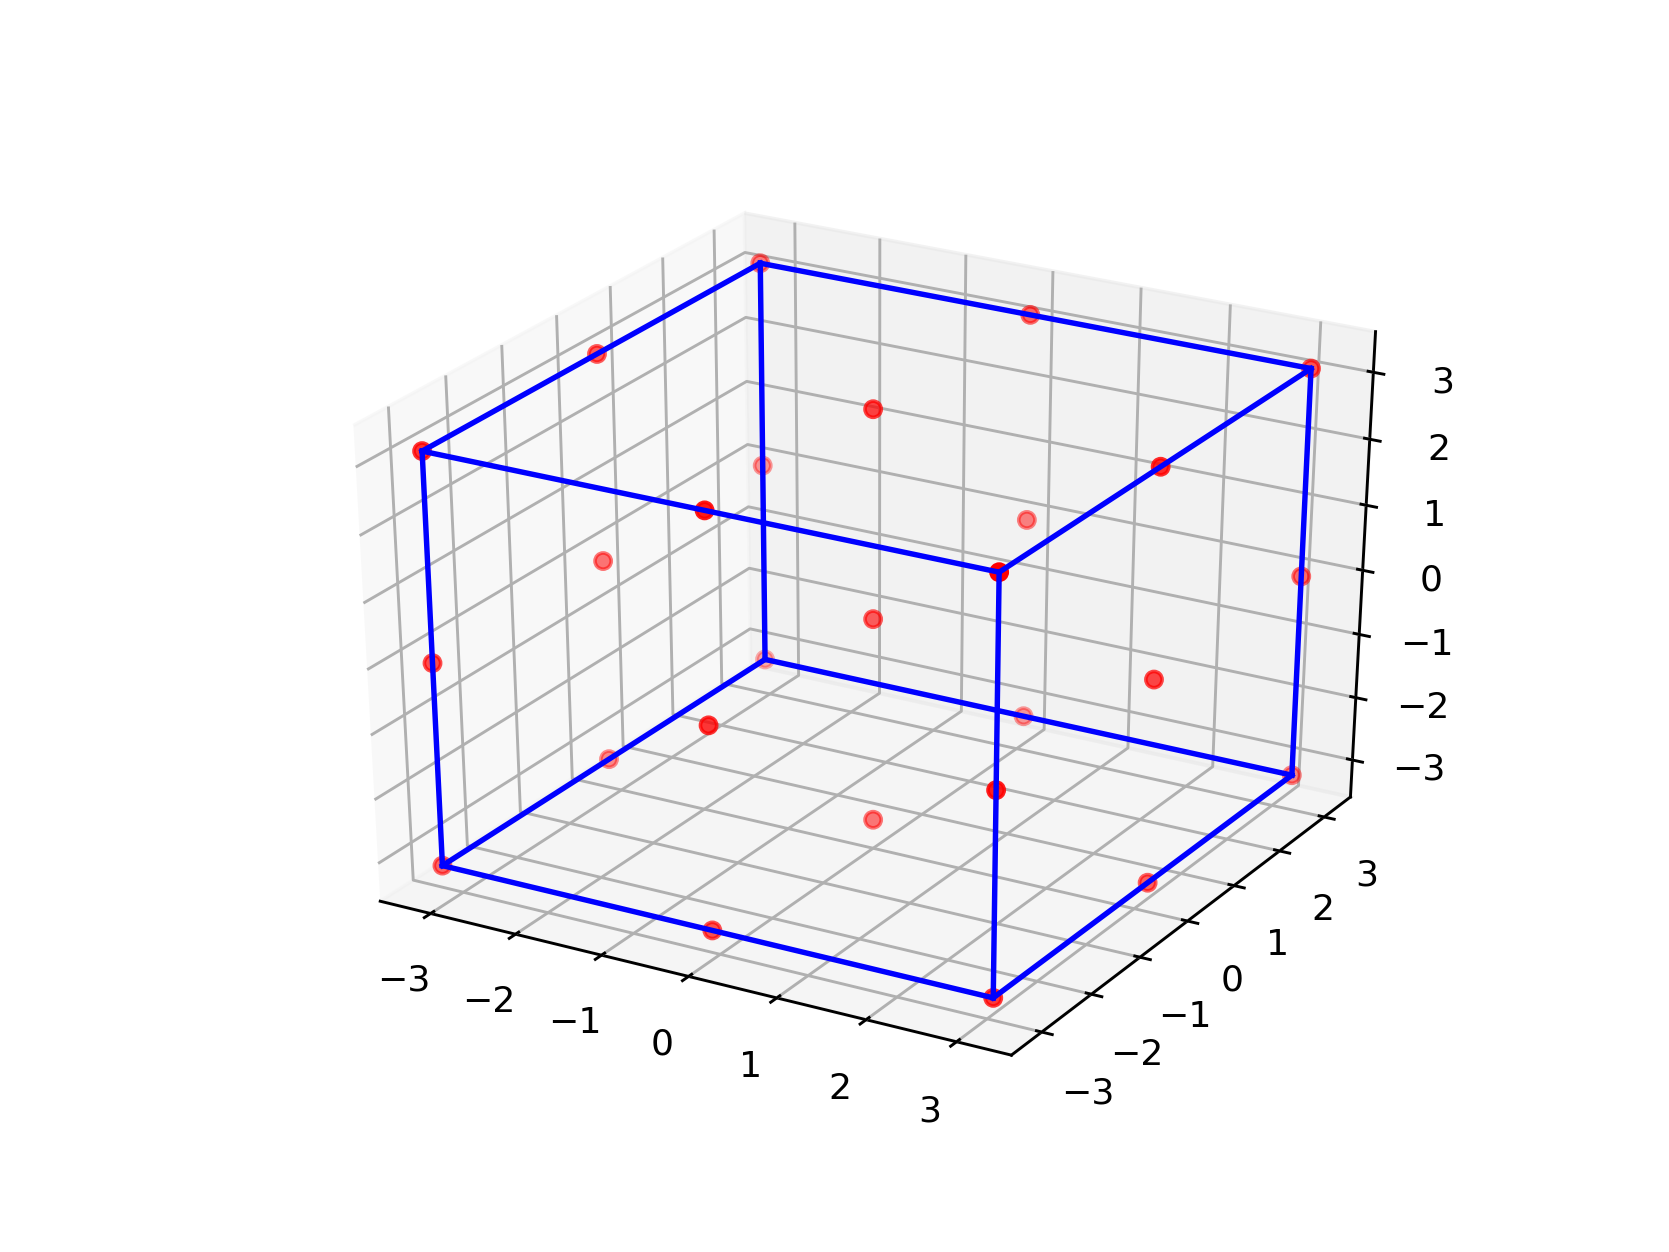

In [40]:
PlotMesh(grid, free.lattice.reciprocal_vectors, offset)

In [44]:
orbs = find_orbitals(grid, free.lattice.reciprocal_vectors, duplicates=True)

{1: [array([ 3.14159265,  3.14159265,  3.14159265])],
 2: [array([ 0.        ,  3.14159265,  3.14159265]),
  array([  3.14159265e+00,  -1.92367069e-16,   3.14159265e+00]),
  array([  3.14159265e+00,   3.14159265e+00,  -3.84734139e-16])],
 3: [array([ 0.        ,  0.        ,  3.14159265]),
  array([  0.00000000e+00,   3.14159265e+00,  -1.92367069e-16]),
  array([  3.14159265e+00,  -1.92367069e-16,  -1.92367069e-16])],
 4: [array([ 0.,  0.,  0.])]}